In [16]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy import special                 
import array
import scipy as sp
from scipy import spatial
from scipy.stats import binned_statistic
import random

In [17]:
with open('a_lyman_limited_value.pkl', 'rb') as f:
    lyman = pickle.load(f)
lyman_distance = []
for i in lyman:
    for z in i:
        lyman_distance.append((np.log10(z[0]),z[4]))
lyman_distance.sort(key = lambda row:(row[0]))

In [18]:
gals = np.loadtxt('hpropsRS.res', usecols=[5,6,7,0,8],unpack=1) 
points = []
for i,j,k in zip(gals[0],gals[1],gals[2]):
    points.append([i,j,k])
mass = []
for i in gals[3]:
    mass.append(i)
radius_points = []
for i in gals[4]:
    radius_points.append(i)

In [19]:
def distance(points1, points2):
    return(np.sqrt((points1[0]-points2[0])**2 +(points1[1]-points2[1])**2+(points1[2]-points2[2])**2))

In [20]:
points.append([0,0,0])
associated_mass = []
for i in lyman_distance:
    points[-1] = (i[1])
    tree = spatial.KDTree(points)
    #look at what is associated
    all_nn_indices = tree.query_ball_point(points[-1],r=2.175e-01*1)
    #check fvir conditions
    for k in all_nn_indices:
        if(points[k] != points[-1]):
        #see if distance in between is smaller than vir distance times by n 
            if(distance(i[1],points[k]) < radius_points[k]*1):
                associated_mass.append(mass[k])

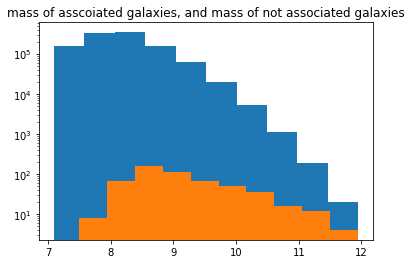

In [34]:
plt.title("mass of asscoiated galaxies, and mass of not associated galaxies")
plt.hist(np.log10(mass))
plt.hist(np.log10(associated_mass))
plt.yscale("log")

In [25]:
with open('associated_mass_1_vir.pkl', 'wb') as f:
    pickle.dump(associated_mass, f, protocol=pickle.HIGHEST_PROTOCOL)